In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
yahoo_data = pd.read_excel(r'C:\Dataset\yahoo_data.xlsx')

yahoo_data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [6]:
# Data Cleaning Steps

# 1. Convert 'Date' to a datetime format
yahoo_data['Date'] = pd.to_datetime(yahoo_data['Date'], format='%b %d, %Y')


In [7]:
# 2. Check for missing values in the dataset
missing_values = yahoo_data.isnull().sum()

missing_values

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [8]:
# 3. Check data types of all columns to ensure they are appropriate
data_types = yahoo_data.dtypes

# Display the results
data_types


Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                  int64
dtype: object

In [9]:
yahoo_data.describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
std,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08


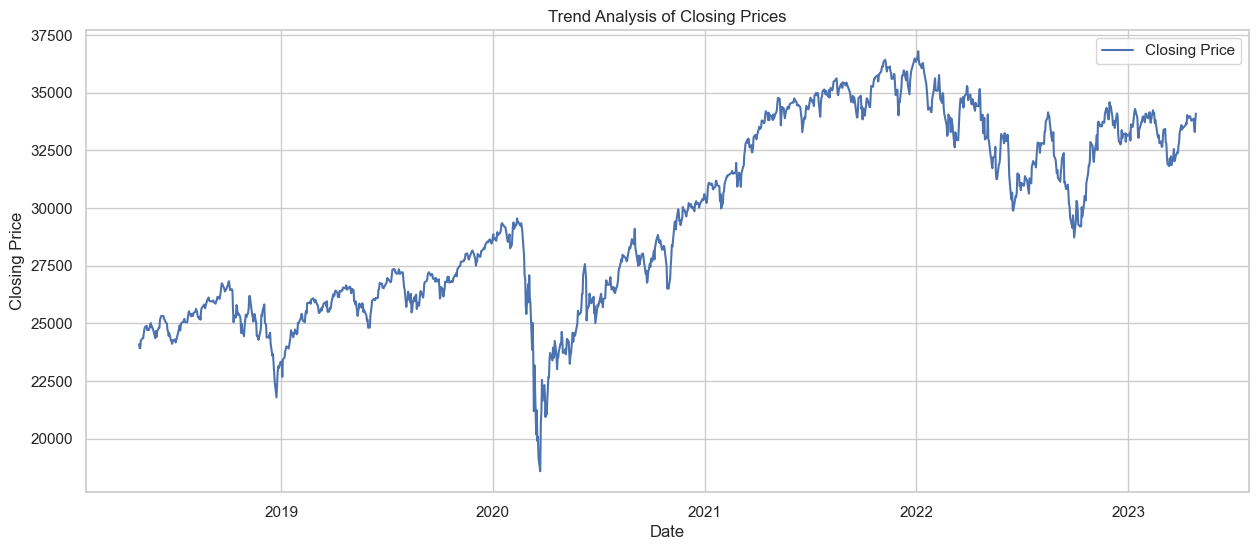

In [10]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Conducting a general analysis which includes:
# 1. Trend Analysis (Closing Prices)
# 2. Volume Analysis
# 3. Daily Range Analysis (High - Low)

# 1. Trend Analysis (Closing Prices)
plt.figure(figsize=(15, 6))
plt.plot(yahoo_data['Date'], yahoo_data['Close*'], label='Closing Price')
plt.title('Trend Analysis of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

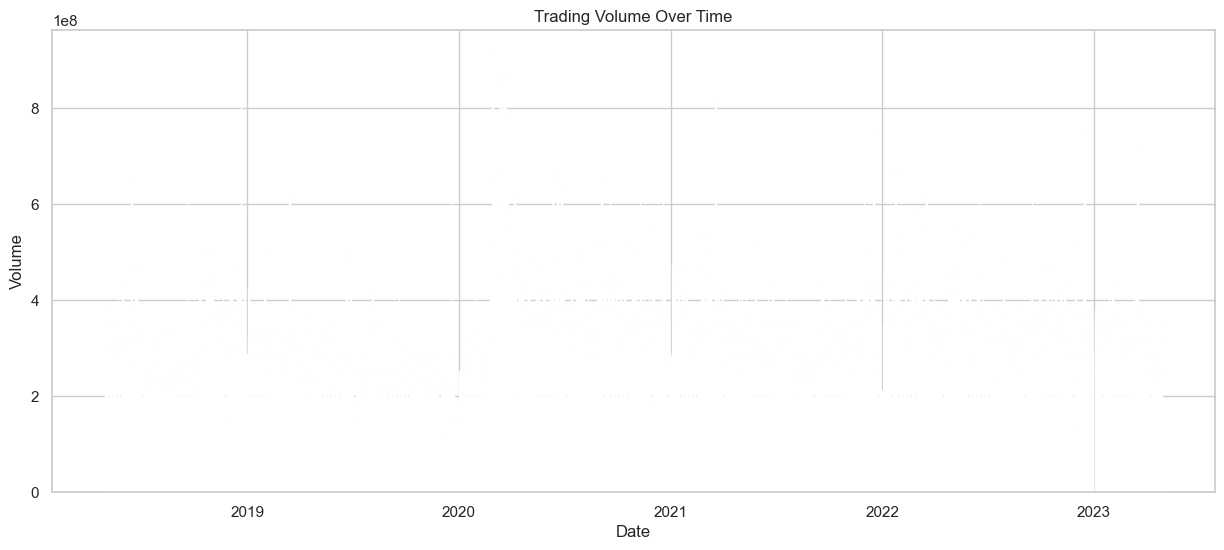

In [11]:
# 2. Volume Analysis
plt.figure(figsize=(15, 6))
plt.bar(yahoo_data['Date'], yahoo_data['Volume'], color='skyblue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

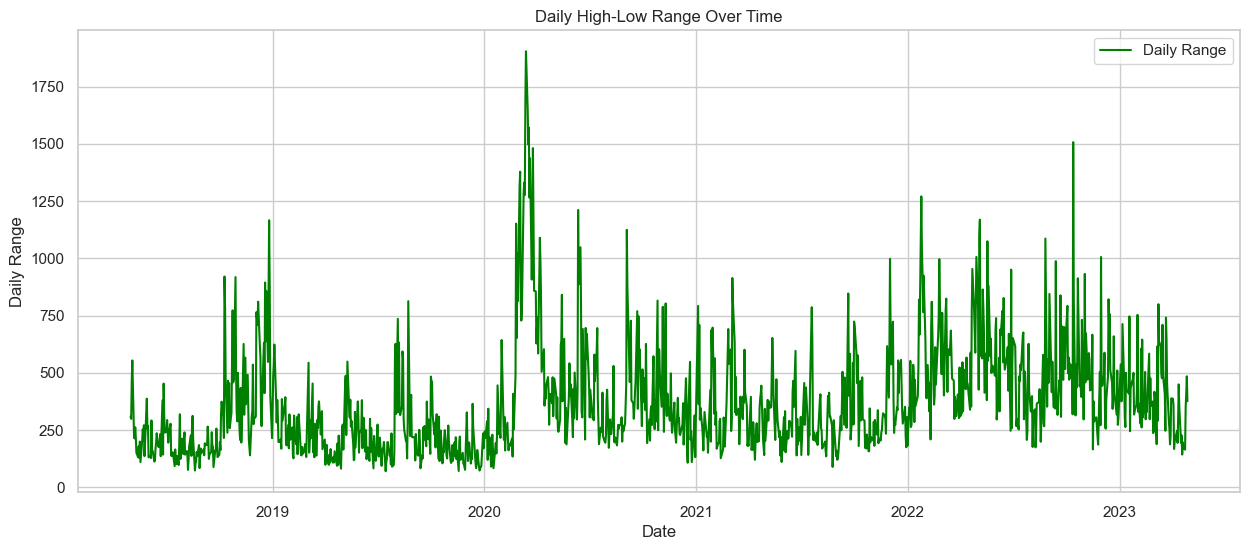

In [12]:
# 3. Daily Range Analysis (High - Low)
yahoo_data['Daily Range'] = yahoo_data['High'] - yahoo_data['Low']
plt.figure(figsize=(15, 6))
plt.plot(yahoo_data['Date'], yahoo_data['Daily Range'], label='Daily Range', color='green')
plt.title('Daily High-Low Range Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.legend()
plt.show()

Trend Analysis of Closing Prices:

The first plot shows the trend in closing prices over time. This gives us an insight into the general movement of stock prices, including any noticeable upward or downward trends.
Trading Volume Over Time:

The second plot illustrates the trading volume over the same period. This can be useful to identify any correlations between volume and price movements. For instance, significant increases in trading volume might coincide with major price changes.
Daily High-Low Range Over Time:

The third plot displays the daily range (difference between the high and low prices each day). This provides a sense of the volatility or stability of the market on a day-to-day basis. Wider ranges indicate more volatility, while narrower ranges suggest stability.

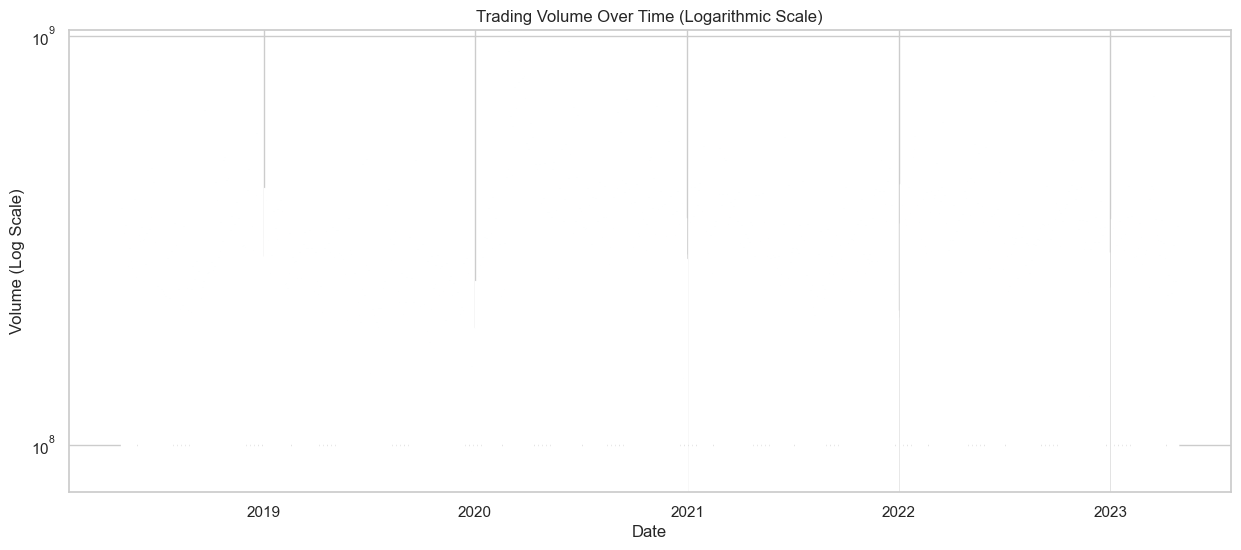

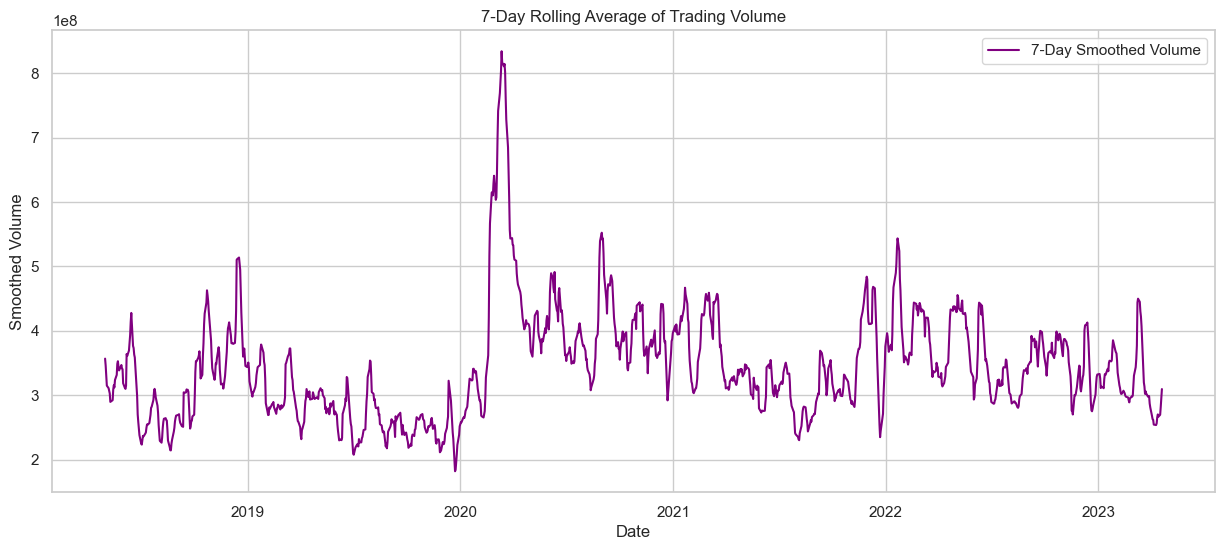

In [13]:
# Using a logarithmic scale for the trading volume

plt.figure(figsize=(15, 6))
plt.bar(yahoo_data['Date'], yahoo_data['Volume'], color='skyblue')
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.title('Trading Volume Over Time (Logarithmic Scale)')
plt.xlabel('Date')
plt.ylabel('Volume (Log Scale)')
plt.show()

# Applying a rolling average to smooth the volume data
rolling_window = 7  # 7-day rolling window
yahoo_data['Volume_Smoothed'] = yahoo_data['Volume'].rolling(window=rolling_window).mean()

plt.figure(figsize=(15, 6))
plt.plot(yahoo_data['Date'], yahoo_data['Volume_Smoothed'], label='7-Day Smoothed Volume', color='purple')
plt.title('7-Day Rolling Average of Trading Volume')
plt.xlabel('Date')
plt.ylabel('Smoothed Volume')
plt.legend()
plt.show()



Trading Volume Over Time (Logarithmic Scale):

The first plot uses a logarithmic scale for the y-axis. This scale allows for a more nuanced view of the trading volume, especially when the volume spans a wide range of values. It makes it easier to observe patterns and variations over time that might be obscured in a linear scale.
7-Day Rolling Average of Trading Volume:

The second plot shows the trading volume after applying a 7-day rolling average, which helps in smoothing out short-term fluctuations. This smoothed plot can make it easier to see longer-term trends and patterns in the trading volume.

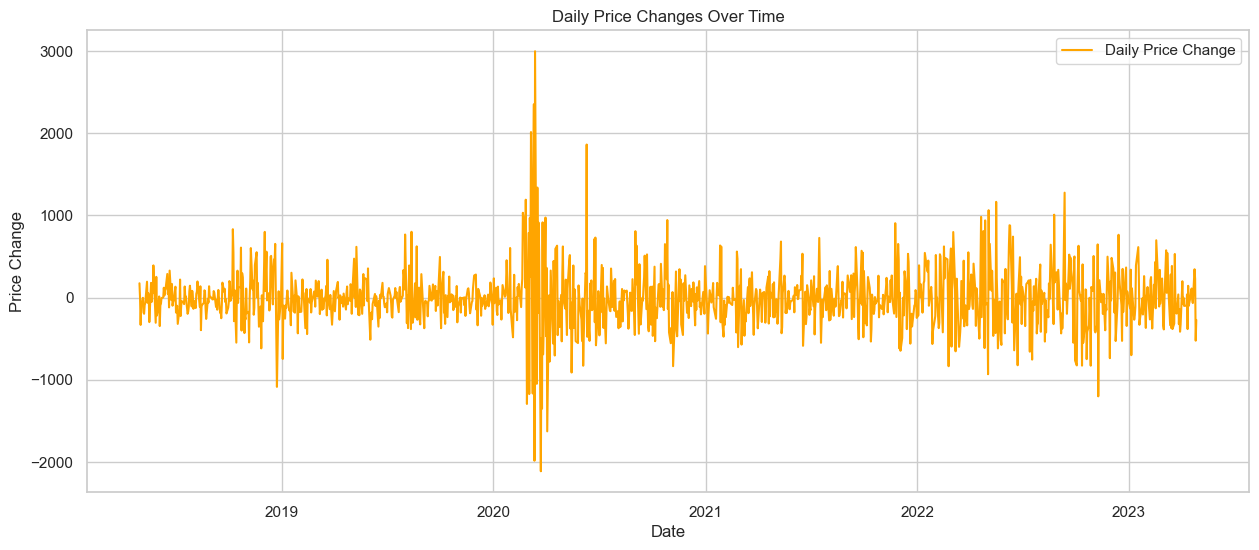

In [14]:
# Calculating daily price changes
yahoo_data['Daily Change'] = yahoo_data['Close*'].diff()

# Calculating the rolling standard deviation for a 30-day window to measure volatility
rolling_window = 30  # 30-day rolling window for volatility
yahoo_data['Volatility'] = yahoo_data['Daily Change'].rolling(window=rolling_window).std()

# Plotting the daily changes
plt.figure(figsize=(15, 6))
plt.plot(yahoo_data['Date'], yahoo_data['Daily Change'], label='Daily Price Change', color='orange')
plt.title('Daily Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.show()




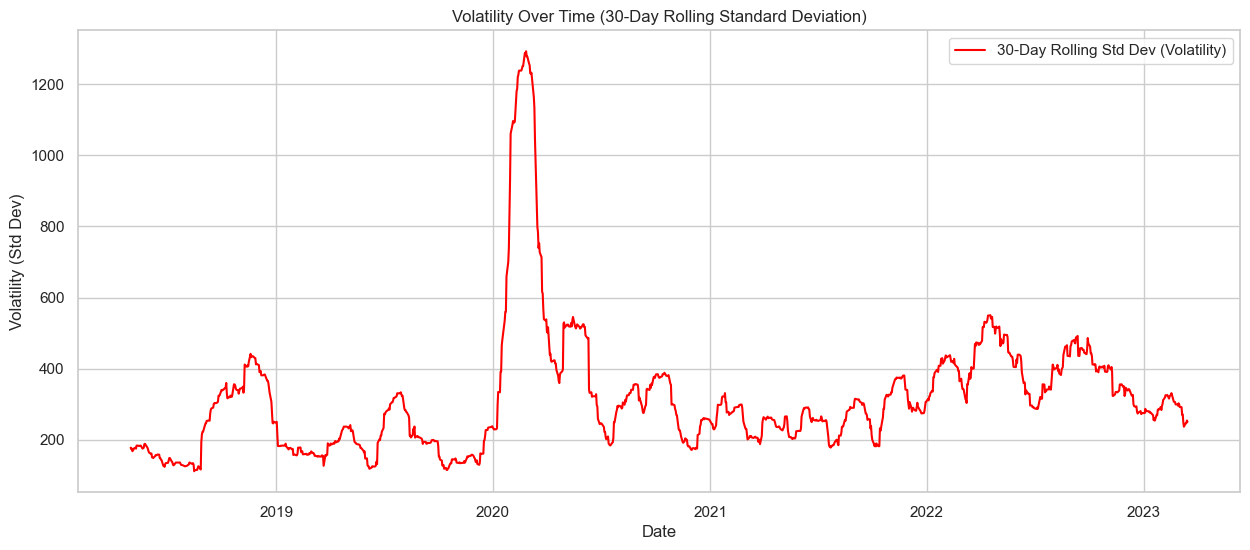

In [15]:
# Plotting the rolling standard deviation of daily changes (Volatility)
plt.figure(figsize=(15, 6))
plt.plot(yahoo_data['Date'], yahoo_data['Volatility'], label='30-Day Rolling Std Dev (Volatility)', color='red')
plt.title('Volatility Over Time (30-Day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.legend()
plt.show()


Daily Price Changes Over Time:

The first plot shows the daily price changes, which are the differences in closing prices from one day to the next. Significant spikes or dips in this plot indicate days with large price movements, which contribute to overall volatility.
Volatility Over Time (30-Day Rolling Standard Deviation):

The second plot displays the volatility as measured by a 30-day rolling standard deviation of daily price changes. This rolling measure smooths out short-term fluctuations and highlights longer-term trends in volatility. Higher values on this plot indicate periods of higher volatility, while lower values suggest more stable periods.

For this analysis, we'll calculate two moving averages:

30-Day Moving Average: This shorter period moving average will help us understand the medium-term trends.

90-Day Moving Average: This longer period moving average will give us insight into the long-term trends.

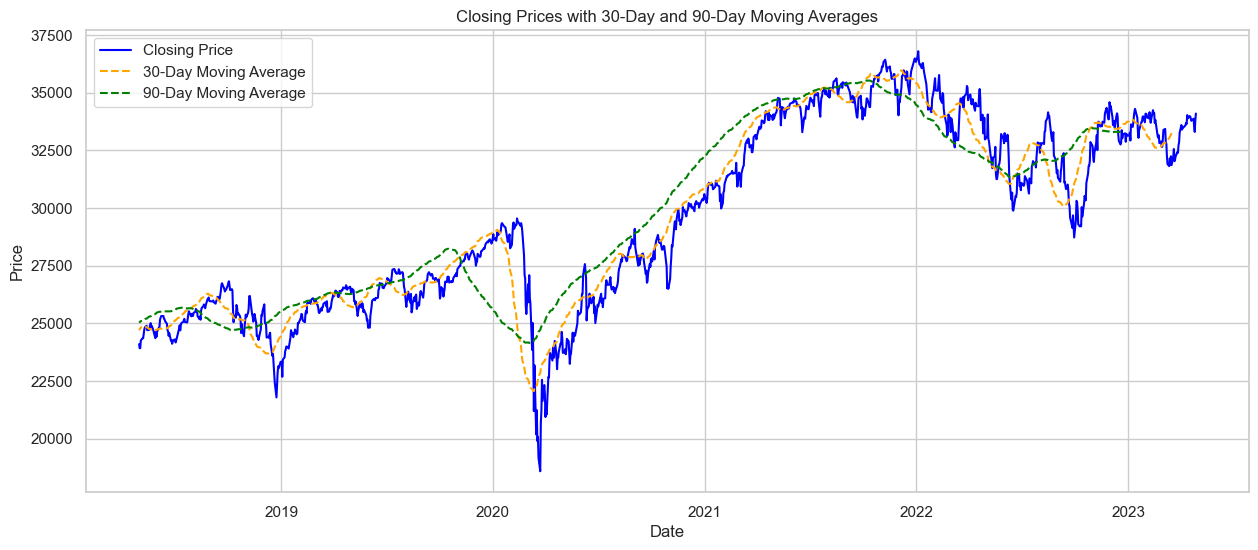

In [16]:
# Calculating moving averages
yahoo_data['30-Day MA'] = yahoo_data['Close*'].rolling(window=30).mean()  # 30-day moving average
yahoo_data['90-Day MA'] = yahoo_data['Close*'].rolling(window=90).mean()  # 90-day moving average

# Plotting the closing prices with the moving averages
plt.figure(figsize=(15, 6))
plt.plot(yahoo_data['Date'], yahoo_data['Close*'], label='Closing Price', color='blue')
plt.plot(yahoo_data['Date'], yahoo_data['30-Day MA'], label='30-Day Moving Average', color='orange', linestyle='--')
plt.plot(yahoo_data['Date'], yahoo_data['90-Day MA'], label='90-Day Moving Average', color='green', linestyle='--')
plt.title('Closing Prices with 30-Day and 90-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The plot above shows the Closing Prices with 30-Day and 90-Day Moving Averages:

The blue line represents the actual closing prices over time.
The orange dashed line is the 30-Day Moving Average, which indicates medium-term trends in the stock price. 

This moving average smooths out the day-to-day fluctuations to give a clearer view of the medium-term direction of the stock price.

The green dashed line is the 90-Day Moving Average, reflecting the long-term trend. It's even smoother than the 30-day average and provides a broader perspective on how the stock price is moving over a more extended period.

This analysis is crucial for identifying trends in stock prices. The points where the closing price crosses the moving averages can be particularly significant. For instance, when the closing price crosses above a moving average, it could be seen as a bullish signal, and conversely, when it crosses below, it might be seen as a bearish signal.

Next, we can proceed with the Day of the Week Analysis to explore if there are any noticeable patterns in stock performance based on the day of the week. 

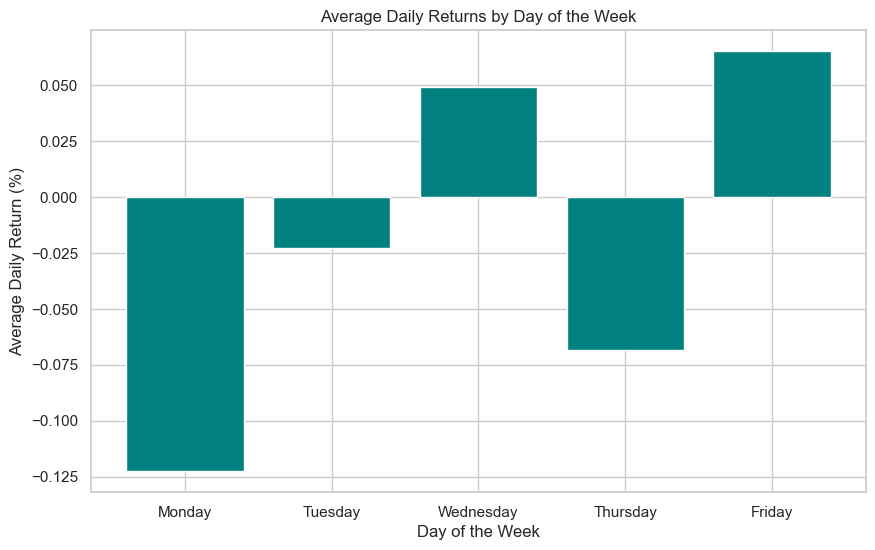

In [17]:
import numpy as np

# Extracting the day of the week from the 'Date' column
# Monday=0, Sunday=6
yahoo_data['Day of the Week'] = yahoo_data['Date'].dt.dayofweek

# Grouping the data by 'Day of the Week' and calculating average daily returns for each day
# Daily return is calculated as the percentage change in closing prices from the previous day
yahoo_data['Daily Return'] = yahoo_data['Close*'].pct_change() * 100
average_daily_returns = yahoo_data.groupby('Day of the Week')['Daily Return'].mean()

# Creating a bar plot for average daily returns by day of the week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10, 6))
plt.bar(days[:5], average_daily_returns, color='teal')
plt.title('Average Daily Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Return (%)')
plt.show()


The bar chart above displays the Average Daily Returns by Day of the Week for the stock data:

Each bar represents the average return for a specific day of the week, calculated as the percentage change in closing prices from the previous day.
This analysis helps in understanding if there are any consistent patterns or anomalies in stock performance based on the day of the week. For example, if returns are consistently higher or lower on certain days, it could suggest a weekly pattern in market behavior.